# Madelon Madness

_Author: Blake Cannon (Caprinomics)_

---
MADELON is an artificial dataset, which was part of the NIPS 2003 feature selection challenge. This is a two-class classification problem with continuous input variables. The difficulty is that the problem is multivariate and highly non-linear. The dataset contains data points grouped in thirty-two clusters placed on the vertices of a five dimensional hypercubes and randomly labeled +1 or -1. The five dimensions constitute five informative features. Fifteen linear combinations of those features were added to form a set of 10 (redundant) informative features. Based on those twenty features, one must separate the examples into the two classes corresponding to the +-1 labels. A number of distractor features called ‘probes’ having no predictive power were added, and the order of the features and patterns are randomized. This makes dealing with the modeling difficult with linear models. Among 500 attributes, only 20 are informative, the rest are noise.

### Domain and Data

While working as a data scientist, I was bidding on a big project that will involve working with thousands or possibly tens of thousands of features. I knww it will be impossible to use conventional feature selection techniques. I decided that the way to win the contract is to demonstrate a capacity to identify relevant features using machine learning. I figured that working with a synthetic dataset such as [Madelon](https://archive.ics.uci.edu/ml/datasets/Madelon) is an excellent way to demonstrate my abilities.

### Problem Statement

The challenge here was to develop a series of models for two purposes:

1. for the purposes of identifying relevant features. 
2. for the purposes of generating predictions from the model.

## Building Test Visuals of MADELON

In [1]:
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

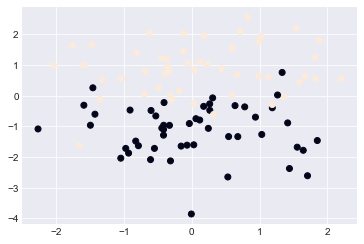

In [2]:
# Make simple dataset one informative features
X, y = make_classification(100, 2, 1, 0, 0, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y)

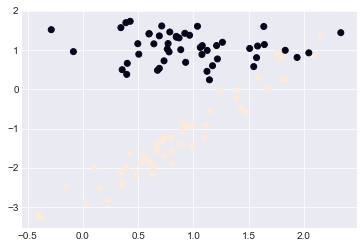

In [3]:
# Two informative features
X, y = make_classification(100, 2, 2, 0, 0, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y)

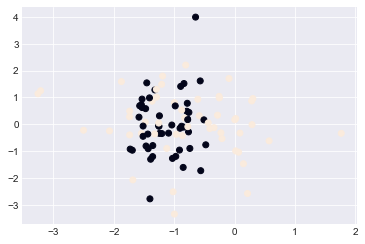

In [4]:
# Two informative features
X, y = make_classification(100, 3, 2, 0, 0, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y)

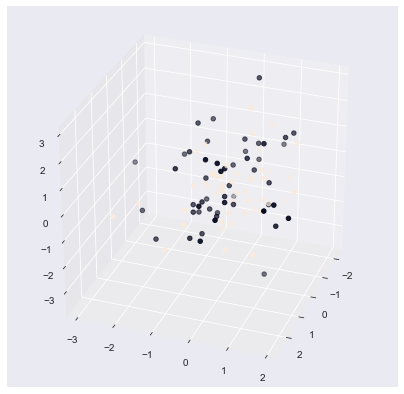

In [5]:
# Two informative features
X, y = make_classification(n_samples=100,
                           n_features=20,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           n_clusters_per_class=3,
                           class_sep=4)

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')
data_1 = X[:,0]
data_2 = X[:,1]
data_3 = X[:,2]
_ = ax.scatter(data_1, data_2, data_3, c=y)
cmaps = 'magma'
ax.view_init(30,20)

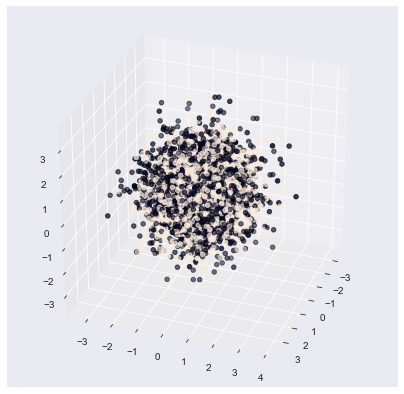

In [6]:
X, y = make_classification(n_samples=4400,
                           n_features=500,
                           n_informative=5,
                           n_redundant=15,
                           n_clusters_per_class=15,
                           class_sep=1.0)

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')
data_1 = X[:,0]
data_2 = X[:,1]
data_3 = X[:,2]
_ = ax.scatter(data_1, data_2, data_3, c=y)
cmaps = 'magma'
ax.view_init(30,20)

## Import Madelon Data from UCI

In [7]:
import urllib.request as urllib2
import numpy as np

In [8]:
# Creating variables of the (long) URLs so as not the clutter up the code later
# Also makes it so if the URL changes I can change it in one place easily
train_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data'
val_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_valid.data'
train_resp_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.labels'
val_resp_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/madelon_valid.labels'
test_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_test.data'

In [9]:
# This data isn't standard csv so using numpy to load it as text
# Download the data straight from the web
X_train = np.loadtxt(urllib2.urlopen(train_data_url))
y_train = np.loadtxt(urllib2.urlopen(train_resp_url))
X_val = np.loadtxt(urllib2.urlopen(val_data_url))
y_val = np.loadtxt(urllib2.urlopen(val_resp_url))
X_test = np.loadtxt(urllib2.urlopen(test_data_url))

In [10]:
# Pickle data for use in other notebooks
# np.save('../data/X_train', X_train)
# np.save('../data/y_train', y_train)
# np.save('../data/X_val', X_val)
# np.save('../data/y_val', y_val)
# np.save('../data/X_test', X_test)

## Exploratory Data Analysis

The Madelon dataset is available at UCI’s Machine Learning Repository and was imported into a Python Jupyter Notebook environment as NumPy arrays. NunPy arrays were chosen over Pandas DataFrames as an effort to reduce memory footprint. The training data was (2000, 500) and the validation data was (600, 500) in matrix form. A Pearson product-moment correlation coefficient plot was created to visualize correlations with the variables.

In [11]:
# Make list of all the madelone data
madelon_data = [X_train, y_train, X_val, y_val]

In [12]:
# Make a function that prints the memory useage of a np array
def print_nbytes(li):
    for i in li:
        print(i.nbytes) 

In [13]:
print_nbytes(madelon_data)

8000000
16000
2400000
4800


In [14]:
# Make function to print data np.shapes
def print_shapes(li):
    for i in li:
        print(i.shape)

In [15]:
# Print the shapes of the madelone data
print_shapes(madelon_data)

(2000, 500)
(2000,)
(600, 500)
(600,)


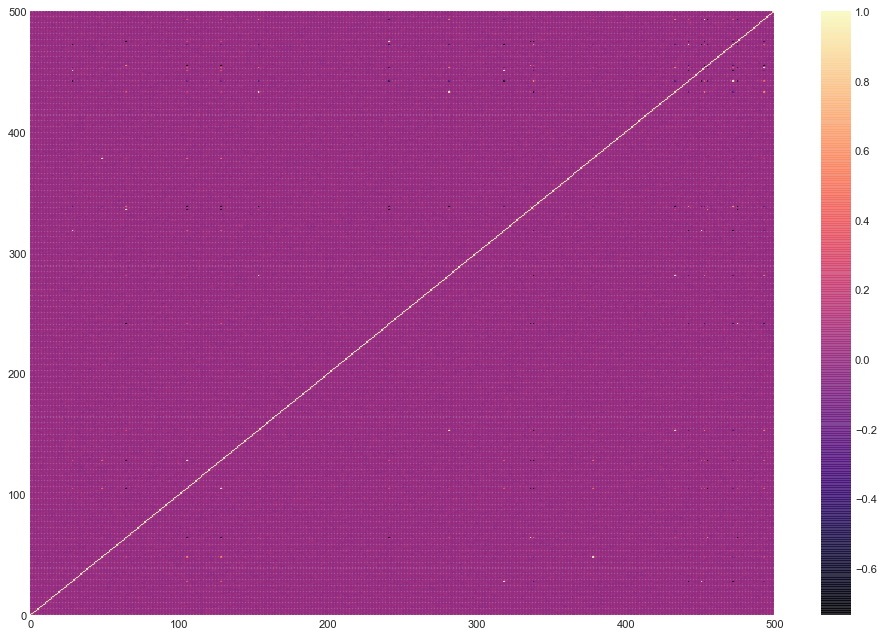

In [16]:
# Plotting Pearson product-moment correlation coefficients (np.corrcoef)
# by using a pseudo color plot of a 2D array

# Full dataset:

plt.figure(figsize=(15,10), dpi=80)
plt.pcolor(np.corrcoef(X_train, rowvar=False),
           cmap=mpl.cm.magma, 
           alpha=0.8)
plt.colorbar()
plt.savefig('../assets/1-1-pcolor-full.png')
plt.show()

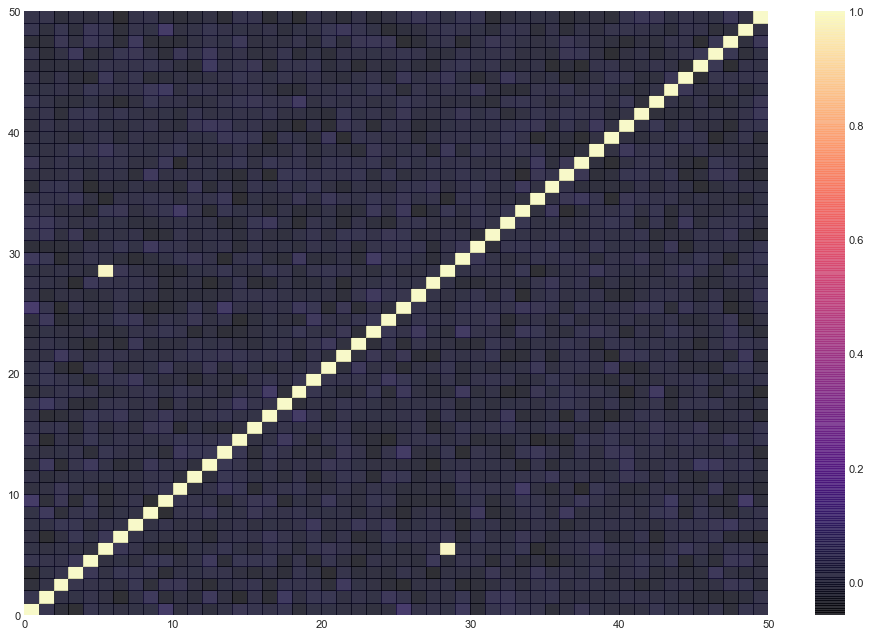

In [17]:
# Plotting Pearson product-moment correlation coefficients (np.corrcoef)
# by using a pseudo color plot of a 2D array

# Sample  dataset:

plt.figure(figsize=(15,10), dpi=80)
plt.pcolor(np.corrcoef(X_train[:,100:150], rowvar=False),
           cmap=mpl.cm.magma,
           alpha=0.8)
plt.colorbar()
plt.savefig('../assets/1-2-pcolor-sample.png')
plt.show()

It can be seen with these visualizations the extent of the dataset’s features as to how only a few very of them have significant correlation. Thus, the dataset is essentially a large amount of noise.

## Decision Tree

A decision tree is a tool that uses a tree-like graph or model of decisions and their possible consequences, including the chance event outcomes, as a display for algorithms that contain conditional control statements. The benefit of decision trees is thatchy are good at isolating and building on important features, highly interpretable, scaling is not needed (decisions are made individually), they work well with a large number of classes, work well with either categorical or numerical variables, and are highly customizable. The weaknesses of decision trees are they do not do well with noisy data, prone to overfitting if left to grow too deep, and potentially computationally expensive. A decision tree classifier was  run on the Madelon dataset, and resulted with a score of 0.765. A weakness of decision trees in this particular dataset is that it is extremely difficult to comprehend. Thus, DecisionTreeClassifier may not be the best model to solve the Madelon problem.


## Decision Tree Classifier

In [18]:
import io
from scipy import misc
import pydotplus as pydot

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO

In [19]:
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

In [20]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

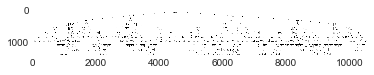

In [21]:
def show_tree(decisionTree, file_path):
    dotfile = io.StringIO()
    export_graphviz(decisionTree, out_file=dotfile)
    pydot.graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    i = misc.imread(file_path)
    plt.imshow(i)

show_tree(tree_clf, '../assets/2-1-tree-class.png')

In [22]:
tree_clf.score(X_val, y_val)

0.76166666666666671

## Decision Tree Regression

In [23]:
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

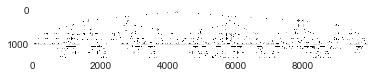

In [24]:
show_tree(tree_reg, '../assets/2-2-tree-reg.png')

In [25]:
tree_reg.score(X_val, y_val)

0.066569794701876739

## Area Under the Curve (AUC)

A logistic regression model was run to score the error measured using area under the curve as a metric. To create a benchmark, roc_auc_score from sklearn.metrics was used to measure the rate of positives vs negatives. Note that a completely random selection would be a baseline of 0.5.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [27]:
# Instatiate and fit the logistic regression model
logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
print(logr.predict_proba(X_train).shape)
logr.predict_proba(X_train)

(2000, 2)


array([[ 0.36124991,  0.63875009],
       [ 0.4658669 ,  0.5341331 ],
       [ 0.70242499,  0.29757501],
       ..., 
       [ 0.67525421,  0.32474579],
       [ 0.47575989,  0.52424011],
       [ 0.29708772,  0.70291228]])

In [29]:
# Print shape of the X_Train
print(logr.predict_proba(X_train)[:,1].shape)
logr.predict_proba(X_train)[:,1]

(2000,)


array([ 0.63875009,  0.5341331 ,  0.29757501, ...,  0.32474579,
        0.52424011,  0.70291228])

In [30]:
# Find the ROC/AUC on one column of the logistic regression predict_proba on the training dataset
roc_auc_score(y_train,logr.predict_proba(X_train)[:,1])

0.82443200000000005

In [31]:
# Find the AUC on one column of the logistic regression predict_proba on the validation dataset
roc_auc_score(y_val,logr.predict_proba(X_val)[:,1])

0.60185555555555559

A baseline of 0.602 is not very good considering random guessing should give us a score of 0.5. Note that the score of 0.824 on the training set is **overfit**.

The Madelon dataset has a massive amount of unimportant features. We know this because of the difference between the ROC-AUC score differences above (0.602:validation vs 0.824:train). So, we need to remove these unimportant features (feature selection) so we can create a better model.

I chose the `f_class` test because it tests differences among classes.

---

## Feature Selection Using f_classif

In order to find the optimal features in the Madelon dataset we'll run a `f_classif` test from the `sklearn` package. Other testing methods are available, but this is a classification problem and `f_class` is specifically designed for this type of problem.

>**What are F-statistics and the F-test?**

>F-tests are named after its test statistic, F, which was named in honor of Sir Ronald Fisher. The F-statistic is simply a ratio of two variances. Variances are a measure of dispersion, or how far the data are scattered from the mean. Larger values represent greater dispersion.

>F is for F-test
>Variance is the square of the standard deviation. For us humans, standard deviations are easier to understand than variances because they’re in the same units as the data rather than squared units. However, many analyses actually use variances in the calculations.

>F-statistics are based on the ratio of mean squares. The term “mean squares” may sound confusing but it is simply an estimate of population variance that accounts for the degrees of freedom (DF) used to calculate that estimate.

>Despite being a ratio of variances, you can use F-tests in a wide variety of situations. Unsurprisingly, the F-test can assess the equality of variances. However, by changing the variances that are included in the ratio, the F-test becomes a very flexible test. For example, you can use F-statistics and F-tests to test the overall significance for a regression model, to compare the fits of different models, to test specific regression terms, and to test the equality of means.

>To use the F-test to determine whether group means are equal, it’s just a matter of including the correct variances in the ratio. In one-way ANOVA, the F-statistic is this ratio:

>**F = variation between sample means / variation within the samples**

>-The Minitab Blog [1]

[1]: http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test

The test will return a p-value. As with p-values, a small p-value (p < 0.05) would indicate whether or not a feature is relative or irrelative.

We'll combine `sklearn`'s `f_classif` and `SelectPercentile` to compute the ANOVA f-value, p-values, and choose a certain percentage of relevant features. 

In [32]:
from sklearn.feature_selection import f_classif, SelectPercentile
from sklearn.preprocessing import PolynomialFeatures

In [33]:
# Set up feature selection by selecting most relative 50 percent of features
select_feature = SelectPercentile(f_classif, percentile=50)
# Fit the feature selection model
select_feature.fit(X_train,y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x1a1be07510>)

Since this is a **classification** problem. we'll use the `SelectPercentile` function to select a percentage of features that score high.

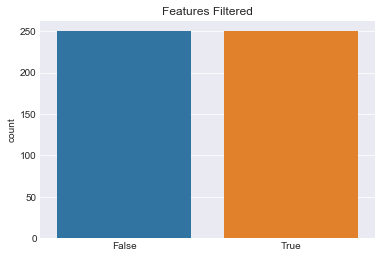

In [34]:
# Now we'll make an array of booleans for those upper 50 percent of features
feature_filter = select_feature.get_support()

# Plot the filter results
sns.countplot(feature_filter)
plt.title('Features Filtered')
plt.savefig('../assets/3-1-feature-filter')
plt.show()

f_classif p-values mean: 0.471989720132


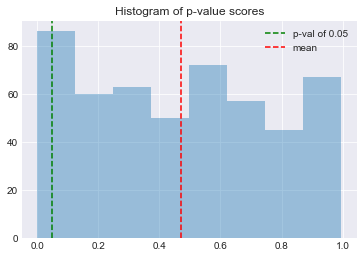

In [35]:
# Here is the mean and array of f_classif p-values of the features
print('f_classif p-values mean:', select_feature.pvalues_.mean())

# Plot histogram of p-value scores
sns.distplot(select_feature.pvalues_, kde=False)
plt.axvline(.05, linestyle='dashed', label='p-val of 0.05', color='g')
plt.axvline(select_feature.pvalues_.mean(), label='mean', linestyle='dashed', color='r')
plt.title('Histogram of p-value scores')
plt.legend()
plt.savefig('../assets/3-2-hist-pvals')
plt.show()

f_classif scores mean: 2.10801794996


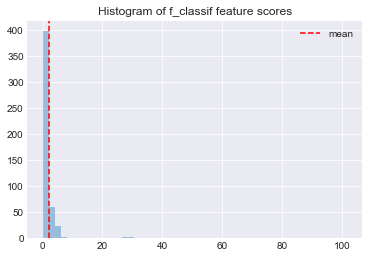

In [36]:
# Here is the mean and array of f_classif scores of the features
print('f_classif scores mean:', select_feature.scores_.mean())

# Plot histogram of f_classif scores
sns.distplot(select_feature.scores_, kde=False)
plt.axvline(select_feature.scores_.mean(), label='mean', linestyle='dashed', color='r')
plt.title('Histogram of f_classif feature scores')
plt.legend()
plt.savefig('../assets/3-3-hist-f_classif-scores')
plt.show()

The of the `select_feature.scores_` is 2.11 and the mean of the `select_feature.pvalues_` is 0.47. This once again shows us that there is a high amount of unimportant features. This same information can clearly be seen in the two histograms. 

The histogram of `select_feature.pvalues_` also shows how many unimportant features there are. The green dashed line on the histogram represents the typical p-value cutoff of 0.05, and the red dashed line is the mean. We can see with this high mean and distribution of p-scores greater than 0.05. A small p-value (less than 0.05) would indicate thata certain feature was useful in predicting the target

The histogram of `select_feature.scores_` indicates that most of the scores are very close to zero. There are a handful of high ranking scores but they are so low in appearance that they can't really be seen on the histogram. We really only know these high scores exist because of the extent of the x-axis.

Next, we'll create a **threshold** and use to pick which features are important.

Number of filtered features: 13
Number of un-filtered features: 487


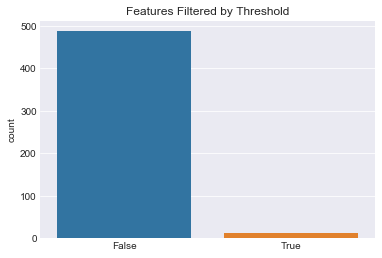

In [37]:
# Create array of booleans of features with scores greater than 10
feature_filter = select_feature.scores_ > 10

# Print sum of 'True' in feature_filter
print('Number of filtered features:', np.sum(feature_filter))
print('Number of un-filtered features:', len(feature_filter) - np.sum(feature_filter))

# Plot the filter results
sns.countplot(feature_filter)
plt.title('Features Filtered by Threshold')    
plt.savefig('../assets/3-4-feature-filter-threshold')
plt.show()

In [38]:
# Generate a new feature matrix consisting of all polynomial combinations of
# the features with degrees less than or equal to 2
interactions = PolynomialFeatures(degree=2, interaction_only=True)
X_interactions = interactions.fit_transform(X_train[:,feature_filter])
print('No of features and their interactions:', X_interactions.shape[1])

No of features and their interactions: 92


In [39]:
# Fit_transform to see if there's any relationships in the model
logr.fit(X_interactions, y_train)
X_val_filtered = interactions.fit_transform(X_val[:,feature_filter])
# Print validation score on the filtered X
roc_auc_score(y_val, logr.predict_proba(X_val_filtered)[:,1])

0.80808888888888886

The ROC/AUC score of 0.808 is just slightly below the original *overfit* score of 0.824 on the training dataset. Thus, it seems that using `p_classif` as a feature selection could be valid because the lower score would mean it's not overfitting but also doing a good job at solving the madelon problem.

In [40]:
# np array of whether or not the feature is important
feature_filter

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [41]:
counter = -1
important_features = []
for i in feature_filter:
    counter += 1
    if i == True:
        important_features.append(counter)
print('Number of important features:', len(important_features))
print('List of important features:', important_features)

Number of important features: 13
List of important features: [48, 64, 105, 128, 241, 336, 338, 378, 442, 453, 472, 475, 493]


The feature selection method above is known as **univariate selection** which decides the best features by looking at how they work individually. Univariate selection does not look at how they would preform together in harmony. The weakness in the method above is collinearity. These methods are simple to run and understand and are in general particularly good for gaining a better understanding of data (but not necessarily for optimizing the feature set for better generalization).
    
In datasets with smaller amount of noise, the correlation is relatively strong, with a very low p-value, while in large datasets with lots of noise (like Madelon), the correlation is very small. Thus, the p-value is high meaning that it is very likely to observe such correlation is by chance.

## Stability Selection Pipeline

In [42]:
# Import packages
from sklearn.linear_model import RandomizedLogisticRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [43]:
# Instatiate and fit the logistic regression model
logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# Manually chosen threshold for testing
threshold = 0.05

In [45]:
stability_selection = RandomizedLogisticRegression(n_resampling=300,
                                                   n_jobs=1,
                                                   random_state=42,
                                                   scaling=0.15,
                                                   sample_fraction=0.50,
                                                   selection_threshold=threshold)

/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
interactions = PolynomialFeatures(degree=4, interaction_only=True)

In [47]:
model = make_pipeline(stability_selection, interactions, logr)

In [48]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('randomizedlogisticregression', RandomizedLogisticRegression(C=1, fit_intercept=True, memory=None, n_jobs=1,
               n_resampling=300, normalize=True, pre_dispatch='3*n_jobs',
               random_state=42, sample_fraction=0.5, scaling=0.15,
               selection_threshold=0.05, t...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [49]:
print('Number of features picked by stability selection: %i' % np.sum(model.steps[0][1].all_scores_ >= threshold))

Number of features picked by stability selection: 15


In [50]:
print('Area Under the Curve: %0.5f' % roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))

Area Under the Curve: 0.88896


In [51]:
feature_filter = model.steps[0][1].all_scores_ >= threshold

In [52]:
counter = -1
important_features = []
for i in feature_filter:
    counter += 1
    if i == True:
        important_features.append(counter)
print('Number of important features:', len(important_features))
print('List of important features:', important_features)

Number of important features: 15
List of important features: [48, 64, 105, 128, 241, 323, 336, 338, 378, 424, 442, 453, 472, 475, 493]


## Find Optimal Threshold

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [54]:
# Instatiate and fit the logistic regression model
logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
# Build a function that makes ranges with floats
def frange(start, stop, step, roundval):
    i = start
    while i < stop:
        yield round(i, roundval)
        i += step

In [56]:
# Make list of thresholds to test
threshold_list = list(frange(0.01, .13, .01, 2))
threshold_list

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13]

In [57]:
features_list = []
rocauc_list = []

for thresh in threshold_list:
    stability_selection = RandomizedLogisticRegression(n_resampling=300,
                                                       n_jobs=1,
                                                       random_state=42,
                                                       scaling=0.15,
                                                       sample_fraction=0.50,
                                                       selection_threshold=thresh)
    interactions = PolynomialFeatures(degree=4, interaction_only=True)
    model = make_pipeline(stability_selection, interactions, logr)
    model.fit(X_train, y_train)
    feature_filter = model.steps[0][1].all_scores_ >= thresh
    
    counter = -1
    important_features = []
    for i in feature_filter:
        counter += 1
        if i == True:
            important_features.append(counter)
    print('Number of important features:', len(important_features))
    print('List of important features:', important_features)
    
    
    
    features_list.append(np.sum(model.steps[0][1].all_scores_ >= thresh))
    rocauc_list.append(roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))

/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 48
List of important features: [10, 43, 44, 48, 55, 56, 64, 105, 119, 128, 136, 149, 152, 196, 199, 204, 205, 211, 226, 241, 245, 278, 282, 286, 296, 298, 323, 329, 336, 338, 377, 378, 384, 409, 410, 411, 413, 424, 430, 431, 442, 453, 454, 456, 472, 475, 493, 496]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 25
List of important features: [48, 55, 64, 105, 128, 196, 204, 205, 241, 286, 296, 323, 336, 338, 377, 378, 384, 424, 430, 431, 442, 453, 472, 475, 493]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 19
List of important features: [48, 64, 105, 128, 204, 205, 241, 323, 336, 338, 378, 424, 430, 431, 442, 453, 472, 475, 493]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 17
List of important features: [48, 64, 105, 128, 204, 205, 241, 323, 336, 338, 378, 424, 442, 453, 472, 475, 493]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 15
List of important features: [48, 64, 105, 128, 241, 323, 336, 338, 378, 424, 442, 453, 472, 475, 493]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 12
List of important features: [48, 64, 105, 128, 241, 323, 336, 378, 442, 453, 472, 475]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 11
List of important features: [48, 64, 105, 128, 241, 336, 378, 442, 453, 472, 475]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 10
List of important features: [48, 64, 105, 128, 241, 336, 378, 442, 453, 475]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 8
List of important features: [48, 64, 105, 241, 336, 378, 453, 475]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 5
List of important features: [48, 241, 336, 378, 475]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 5
List of important features: [48, 241, 336, 378, 475]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 5
List of important features: [48, 241, 336, 378, 475]


/Users/blake/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Number of important features: 5
List of important features: [48, 241, 336, 378, 475]


In [59]:
import pandas as pd

results_df = pd.DataFrame({'threshold': threshold_list,
                           'score': rocauc_list,
                           'no-of-features': features_list})
results_df.set_index('threshold',inplace=True)
results_df

,no-of-features,score
threshold,,
0.01,48,0.760156
0.02,25,0.843556
0.03,19,0.859044
0.04,17,0.898767
0.05,15,0.888956
0.06,12,0.898267
0.07,11,0.898233
0.08,10,0.814422
0.09,8,0.765956


In [60]:
# Pickle DataFrame
# results_df.to_pickle('../data/results_df.p')

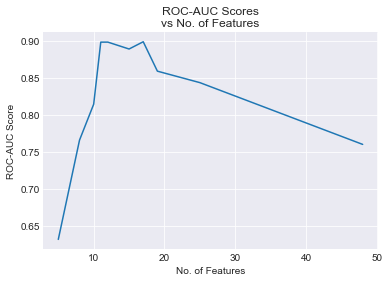

In [64]:
# Plot ROC-AUC score vs number of features
plt.plot(features_list, rocauc_list)
plt.xlabel('No. of Features')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores\nvs No. of Features')
plt.legend()
plt.savefig('../assets/5-2-rocauc-scores-vs-features.png')
plt.show()

The code and plot above show the thresholds and the number of important features. 